In [7]:
import networkx as nx

G = nx.Graph()
nodes= ["A", "B", "C", "D", "E"]
G.add_nodes_from(nodes)
print("Object type of G: ", type(G))
print("Nodes of Graph G:", G.nodes)

Object type of G:  <class 'networkx.classes.graph.Graph'>
Nodes of Graph G ['A', 'B', 'C', 'D', 'E']


In [8]:
edges= [("A", "B"), ("A", "C"), ("B", "C"), ("C", "E"), ("B", "D"), ("D", "E")]
G.add_edges_from(edges)
print("Edges of Graph G:", G.edges)

Edges of Graph G: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E')]


In [13]:
G.nodes["A"]['label'] = 'Alpha'
G.nodes["A"]['description'] = 'First member of the team'
G.nodes["A"]['color'] = 'Red'
print(G.nodes(data= True))

[('A', {'label': 'Alpha', 'description': 'First member of the team', 'color': 'Red'}), ('B', {}), ('C', {}), ('D', {}), ('E', {})]


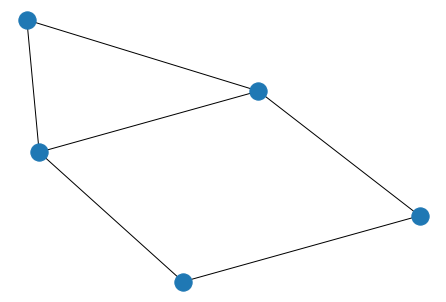

In [38]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

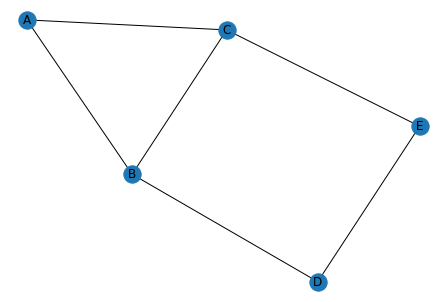

In [39]:
nx.draw(G, with_labels= True)

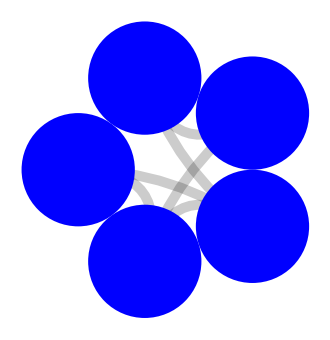

In [74]:
import nxviz as nv
ap = nv.CircosPlot(G, edge_width= [10]*6, node_size= 0.1)
ap.draw() 
plt.show()

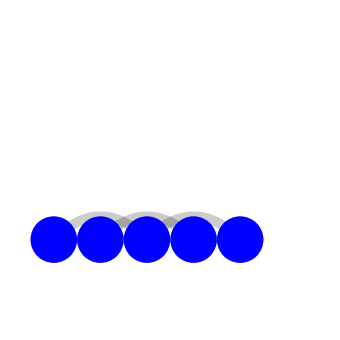

In [65]:
import nxviz as nv
ap = nv.ArcPlot(G, edge_width= [10]*6, node_labels= [1]*5)
ap.draw() 
plt.show()

In [45]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 0, 0, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 1, 1, 0]])

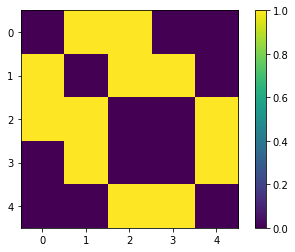

In [46]:
import numpy as np
plt.imshow(nx.adjacency_matrix(G).todense())
plt.colorbar()
plt.show()

### Making Network of Tabular Data 

In [2]:
import networkx as nx
from pandas import read_csv
routes= read_csv("routes.csv")
routes.head(5)

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [105]:
routes[routes["Codeshare"].isna()== False]

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
186,2P,897,GES,2402,MNL,2397,Y,0,320
196,2P,897,MNL,2397,GES,2402,Y,0,320
1058,4M,3201,DFW,3670,EZE,3988,Y,0,777
1059,4M,3201,EZE,3988,DFW,3670,Y,0,777
1060,4M,3201,EZE,3988,JFK,3797,Y,0,777
...,...,...,...,...,...,...,...,...,...
67428,ZH,4611,ZHA,6357,PEK,3364,Y,0,737
67430,ZH,4611,ZUH,6355,CKG,3393,Y,0,737
67431,ZH,4611,ZUH,6355,CTU,3395,Y,0,319
67435,ZH,4611,ZUH,6355,PEK,3364,Y,0,737 320


In [15]:
nodes= [row["Source airport"] for item, row in routes.iterrows()]
edges= [(row["Source airport"], row["Destination airport"]) for item, row in routes.iterrows()]

In [16]:
routes_graph= nx.Graph()
routes_graph.add_nodes_from(nodes)
routes_graph.add_edges_from(edges)

### Graph Visualisation

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

british_routes= routes[routes["Airline"]== "BA"]
nodes= [row["Source airport"] for item, row in british_routes.iterrows()]
edges= [(row["Source airport"], row["Destination airport"]) for item, row in british_routes.iterrows()]
british_routes= nx.Graph()
british_routes.add_nodes_from(nodes)
british_routes.add_edges_from(edges)

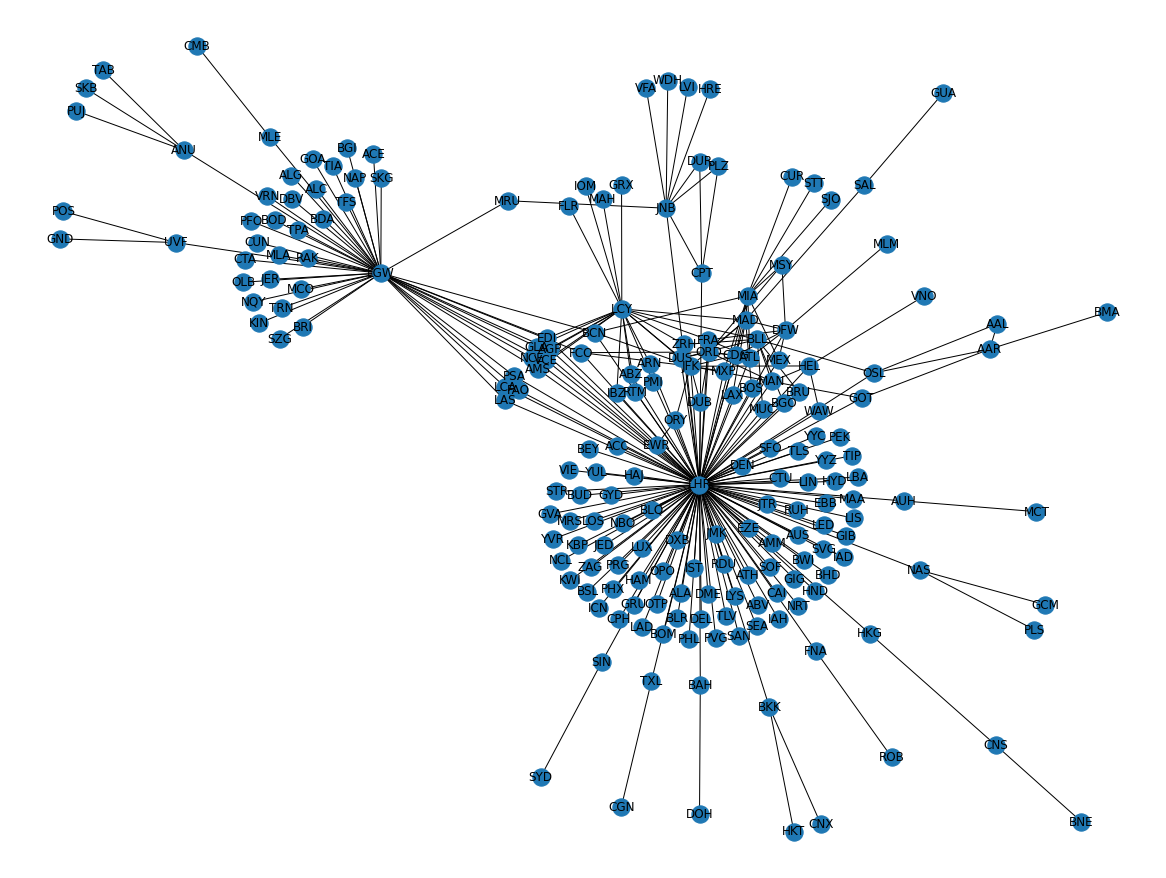

In [140]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, 
        with_labels=True)
plt.show()

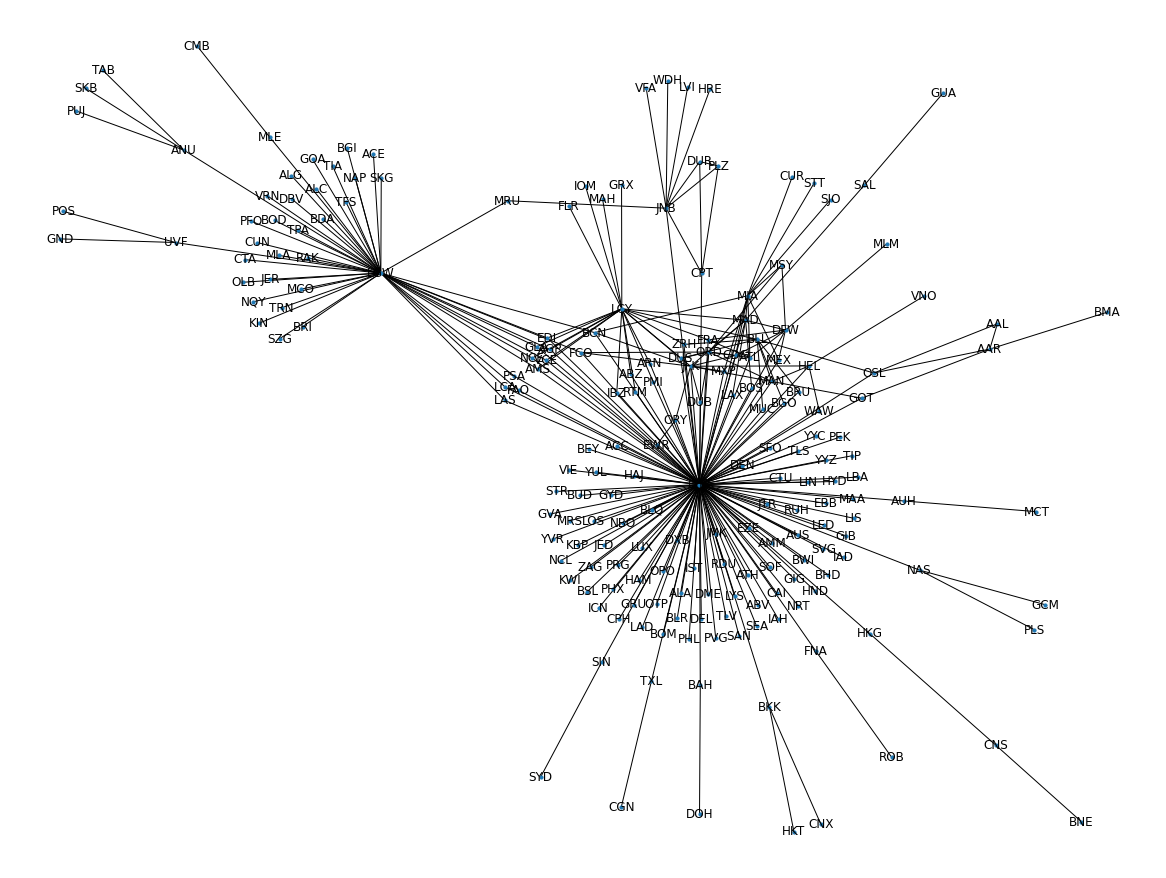

In [144]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, 
        with_labels=True, node_size= 10)
plt.show()

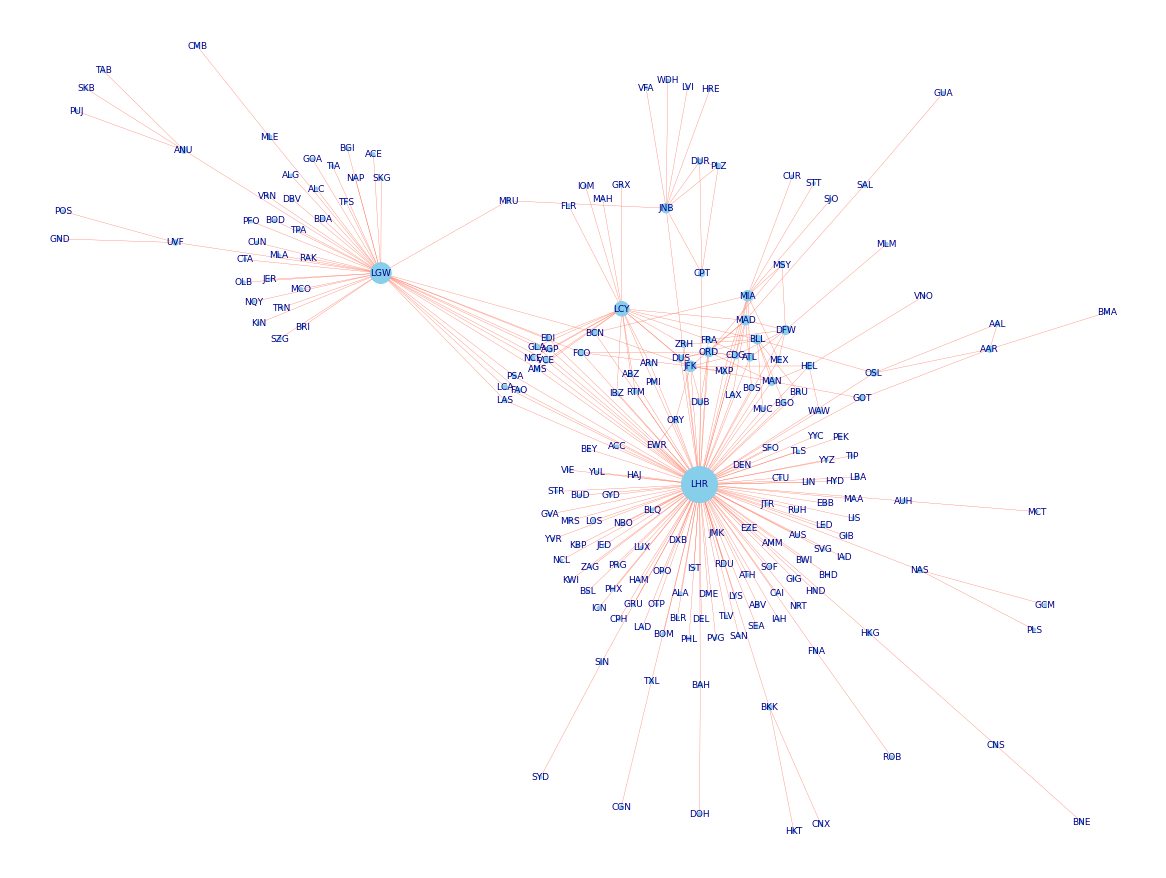

In [242]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
node_sizes= [degree[1]*10 for degree in british_routes.degree]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.cm.pink, 
        with_labels=True,
        node_color= "skyblue",
        node_size= node_sizes, 
        edge_color= "tomato", 
        width= 0.3,
        font_size=9,
        font_color= "darkblue")
plt.show()

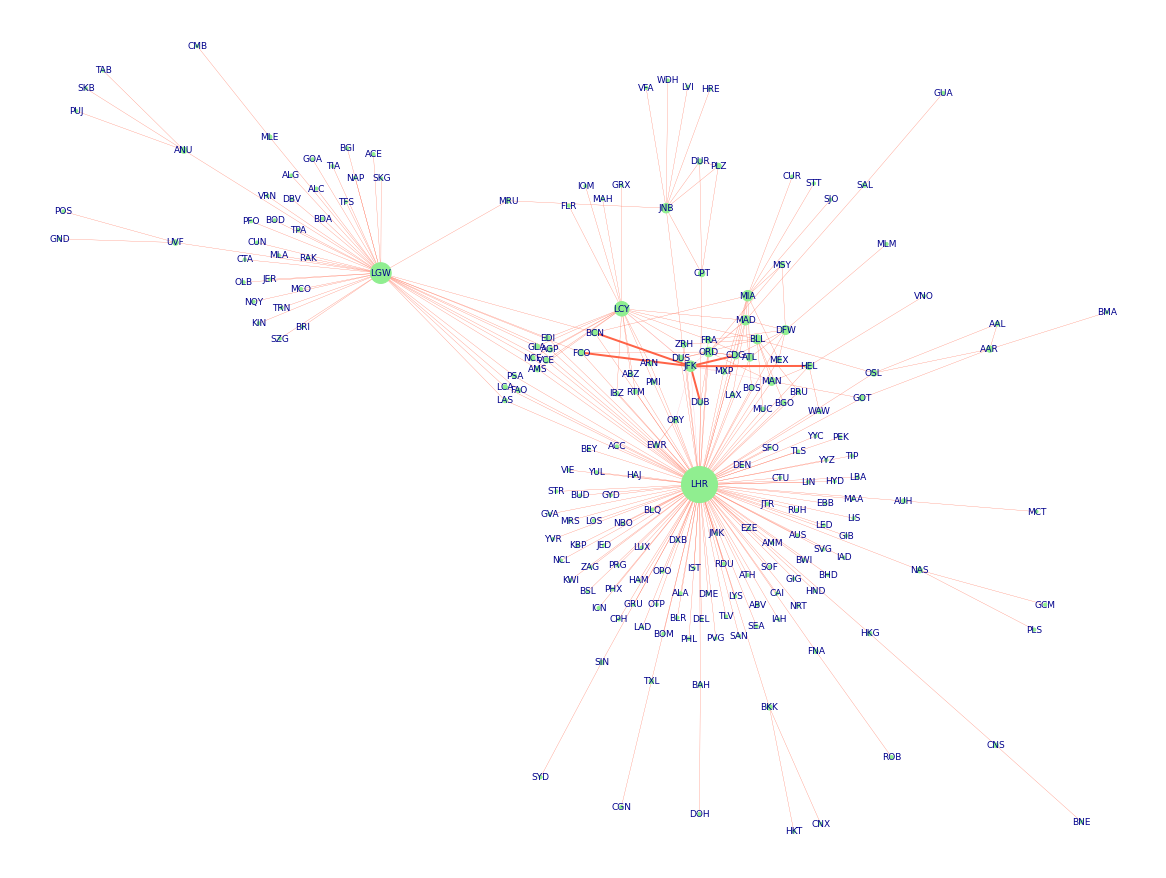

In [243]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
node_sizes= [degree[1]*10 for degree in british_routes.degree]
weights= [2 if edge[1]== "JFK" else 0.25 for edge in british_routes.edges]
edge_color= ["lightpink" if edge[0]== "JFK" else "tomato" for edge in british_routes.edges]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= edge_color, 
        width= weights,
        font_size=9,
        font_color= "darkblue")
plt.show()

[Text(130.4, 0, '130'),
 Text(43.4, 0, '43'),
 Text(21.4, 0, '21'),
 Text(11.4, 0, '11'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1')]

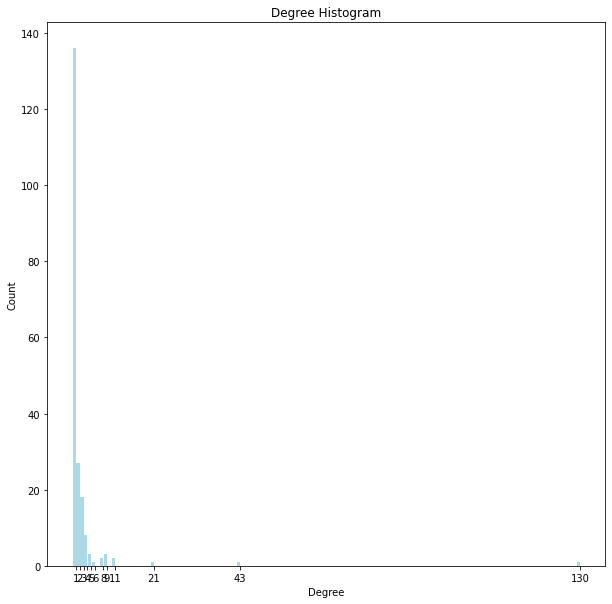

In [132]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in british_routes.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="lightblue")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

Text(0.5, 1.0, 'Degree distribution')

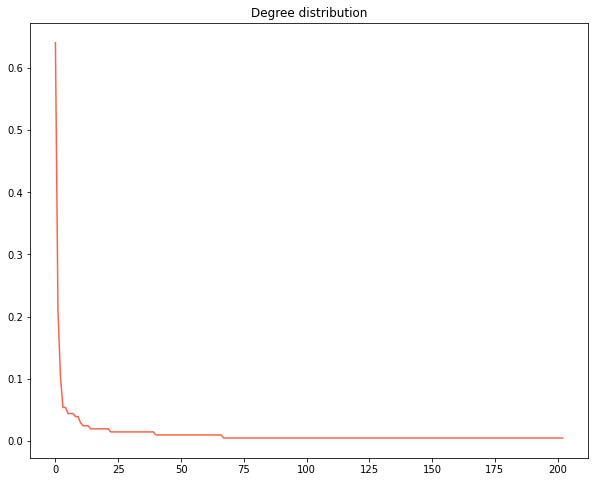

In [136]:
degree_distribution= [int(degree[1]) for degree in british_routes.degree]
degree_distribution= [val/ len(degree_distribution) for val in degree_distribution]
degree_distribution.sort(reverse= True)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(degree_distribution, color= "tomato")
plt.title("Degree distribution")

[Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1'),
 Text(0.4, 0, '0')]

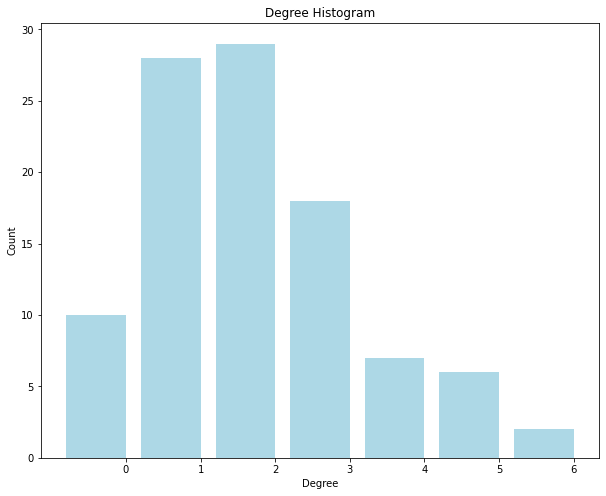

In [130]:
import collections
import matplotlib.pyplot as plt


random_graph = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in random_graph.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="lightblue")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

Text(0.5, 1.0, 'Degree distribution')

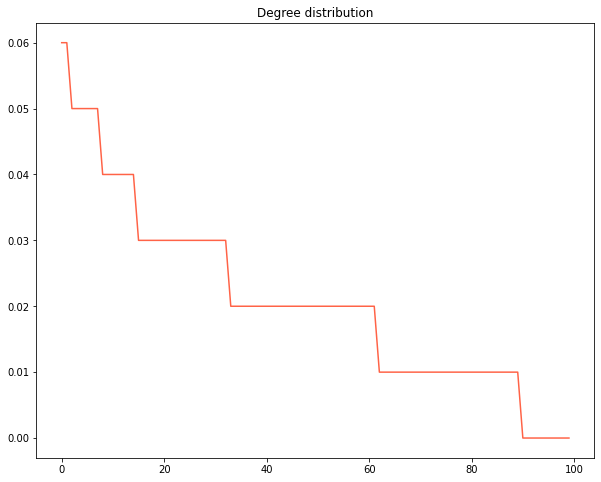

In [138]:
degree_distribution= [int(degree[1]) for degree in random_graph.degree]
degree_distribution= [val/ len(degree_distribution) for val in degree_distribution]
degree_distribution.sort(reverse= True)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(degree_distribution, color= "tomato")
plt.title("Degree distribution")

## Influence Measures

### Degree Centrality

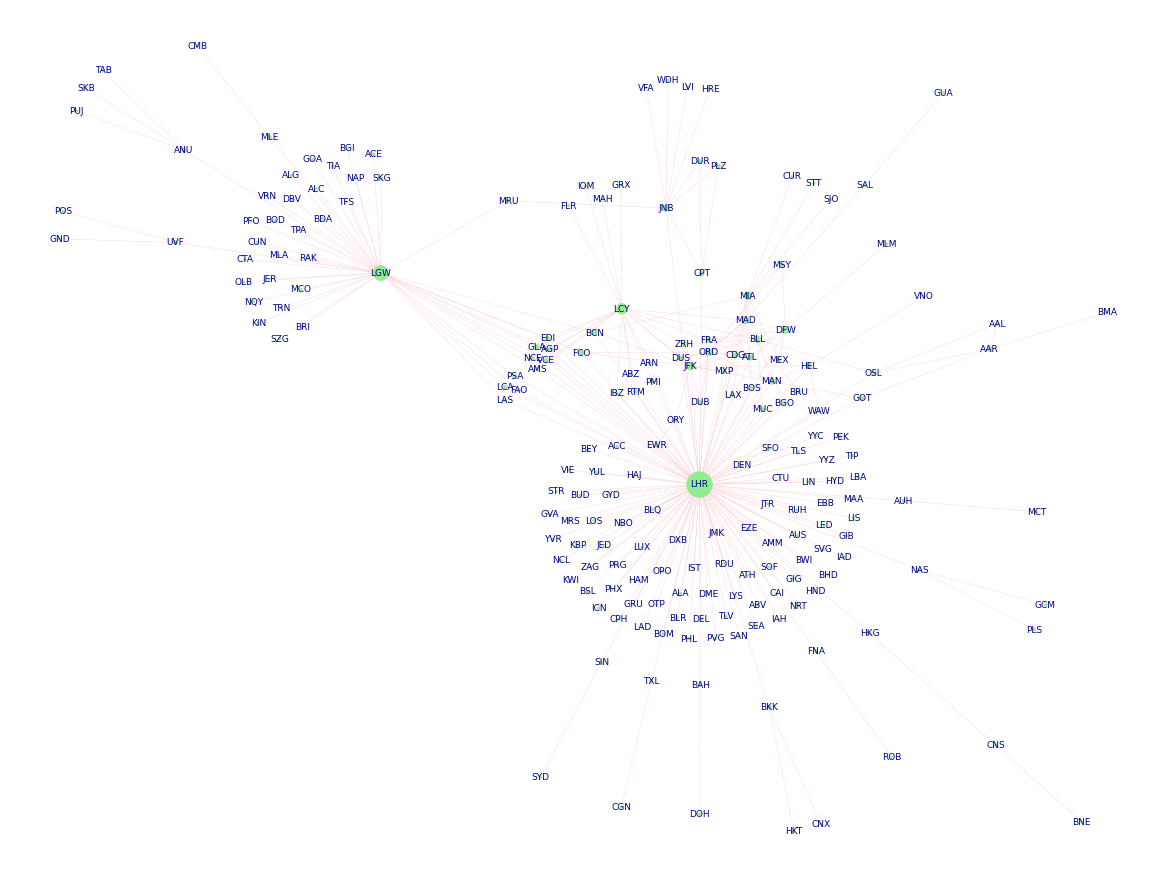

In [75]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
degree_centrality= nx.degree_centrality(british_routes)
node_sizes= list(degree_centrality.values())
node_sizes= [val*1000 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Betweenness Centrality

In [292]:
import operator

betweenness_centrality= nx.betweenness_centrality(british_routes, seed= 42)
betweenness_centrality= dict(sorted(betweenness_centrality.items(), 
            key=operator.itemgetter(1),
            reverse=True))

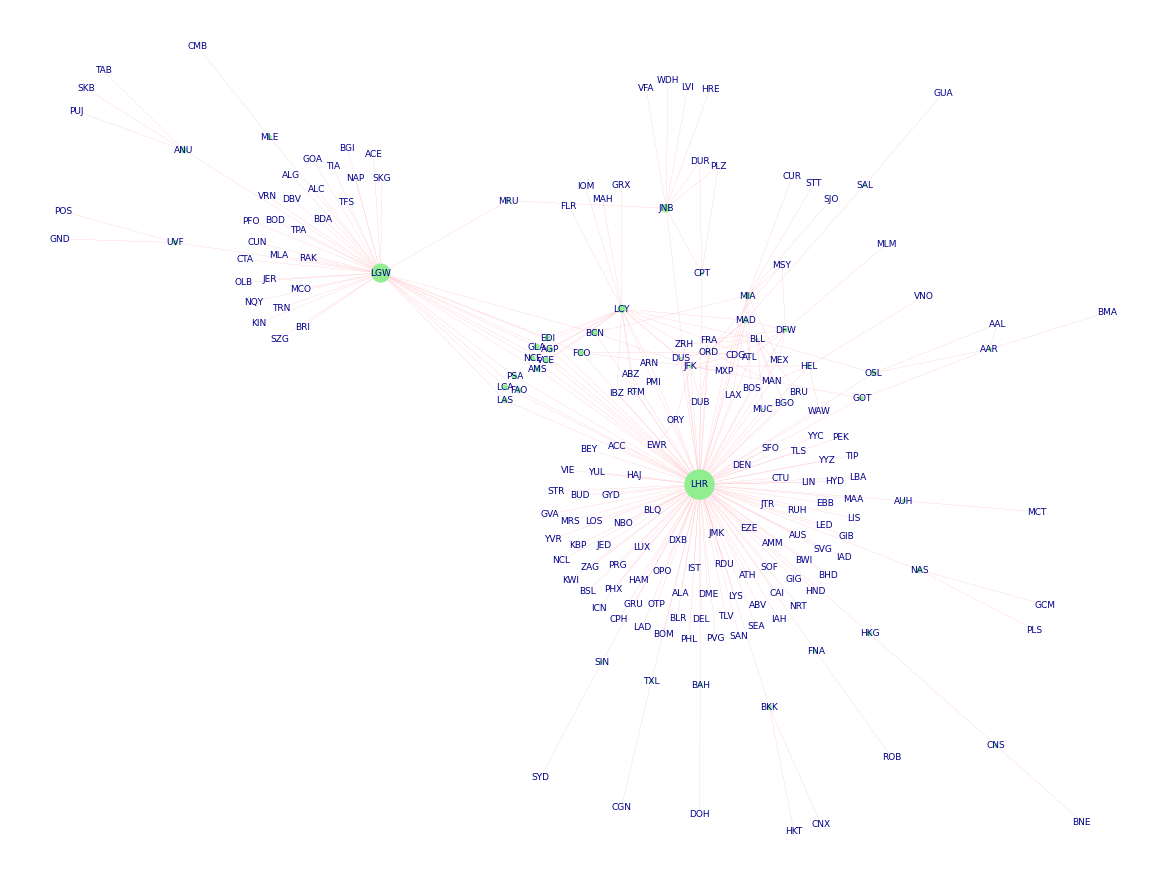

In [328]:
betweenness_centrality= nx.betweenness_centrality(british_routes, seed= 42)

plt.rcParams['figure.figsize'] = (16.0, 12.0)
node_sizes= list(betweenness_centrality.values())
node_sizes= [val* 1000 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Closeness Centrality

In [335]:
import operator

closeness_centrality= nx.closeness_centrality(british_routes)
closeness_centrality= dict(sorted(closeness_centrality.items(), 
            key=operator.itemgetter(1),
            reverse=True))

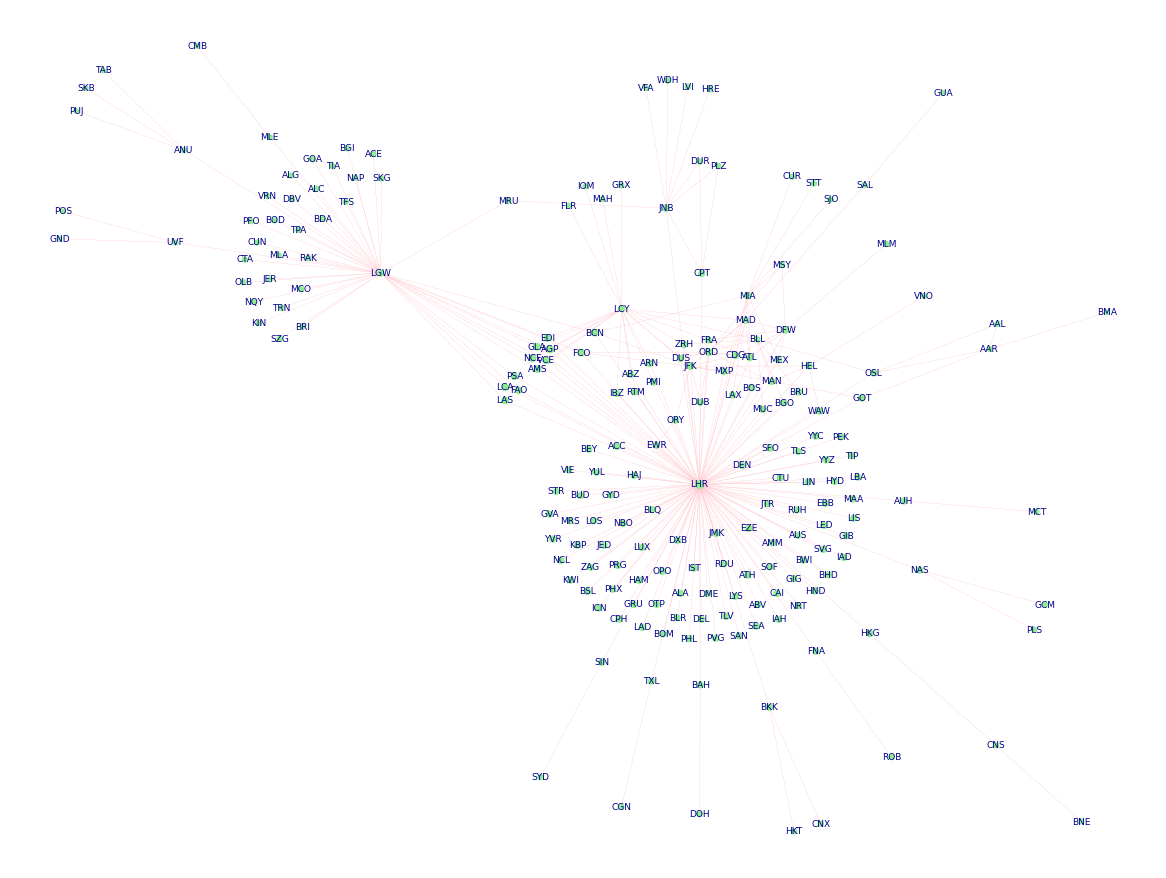

In [340]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
closeness_centrality= nx.closeness_centrality(british_routes)
node_sizes= list(closeness_centrality.values())
node_sizes= [val*100 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Eigenvector Centrality

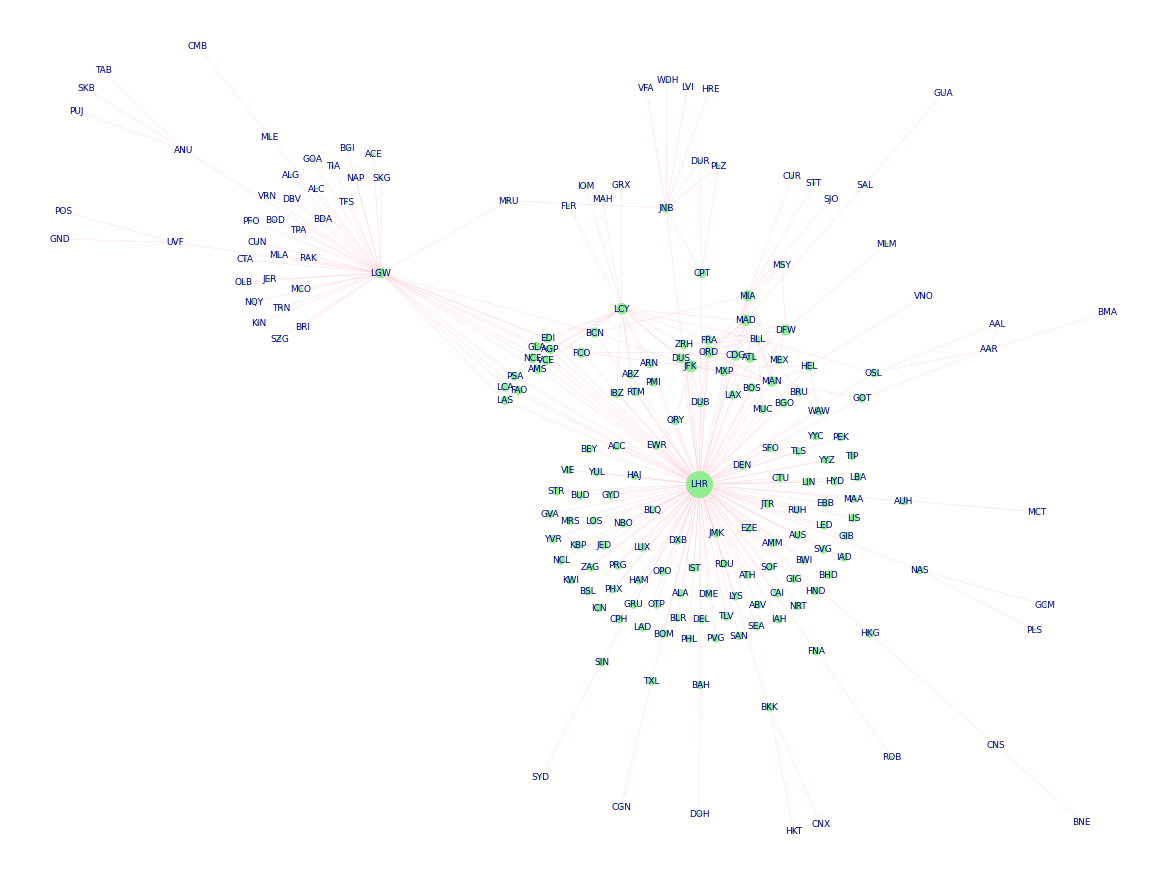

In [343]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
eigenvector_centrality= nx.eigenvector_centrality(british_routes)
node_sizes= list(eigenvector_centrality.values())
node_sizes= [val*1000 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

## Graph Traversal

In [21]:
print("Shortest route from London, UK to Genoa, Italy: ", 
      nx.shortest_path(british_routes, "LHR", "GOA"))
print("Shortest route length (in terms of number of edges): ",
      nx.shortest_path_length(british_routes, "LHR", "GOA"))

Shortest route from London, UK to Genoa, Italy:  ['LHR', 'AGP', 'LGW', 'GOA']
Shortest route length (in terms of number of edges):  3


In [33]:
shortest_paths= nx.shortest_simple_paths(british_routes, "LHR", "GOA")
count= 0
for element in shortest_paths:
    if count< 10:
        print(element)
        count+= 1
    else:
        break

['LHR', 'AGP', 'LGW', 'GOA']
['LHR', 'AMS', 'LGW', 'GOA']
['LHR', 'BCN', 'LGW', 'GOA']
['LHR', 'EDI', 'LGW', 'GOA']
['LHR', 'FAO', 'LGW', 'GOA']
['LHR', 'FCO', 'LGW', 'GOA']
['LHR', 'GLA', 'LGW', 'GOA']
['LHR', 'LAS', 'LGW', 'GOA']
['LHR', 'LCA', 'LGW', 'GOA']
['LHR', 'NCE', 'LGW', 'GOA']


## Graph Clustering

In [150]:
node_colors= ["skyblue" if "GOA" in community else "maroon" 
 for community in list(nx.community.asyn_lpa_communities(british_routes, seed= 42)) for node in community]
node_sizes= [500 if "GOA" in community else 1 
 for community in list(nx.community.asyn_lpa_communities(british_routes, seed= 42)) for node in community]

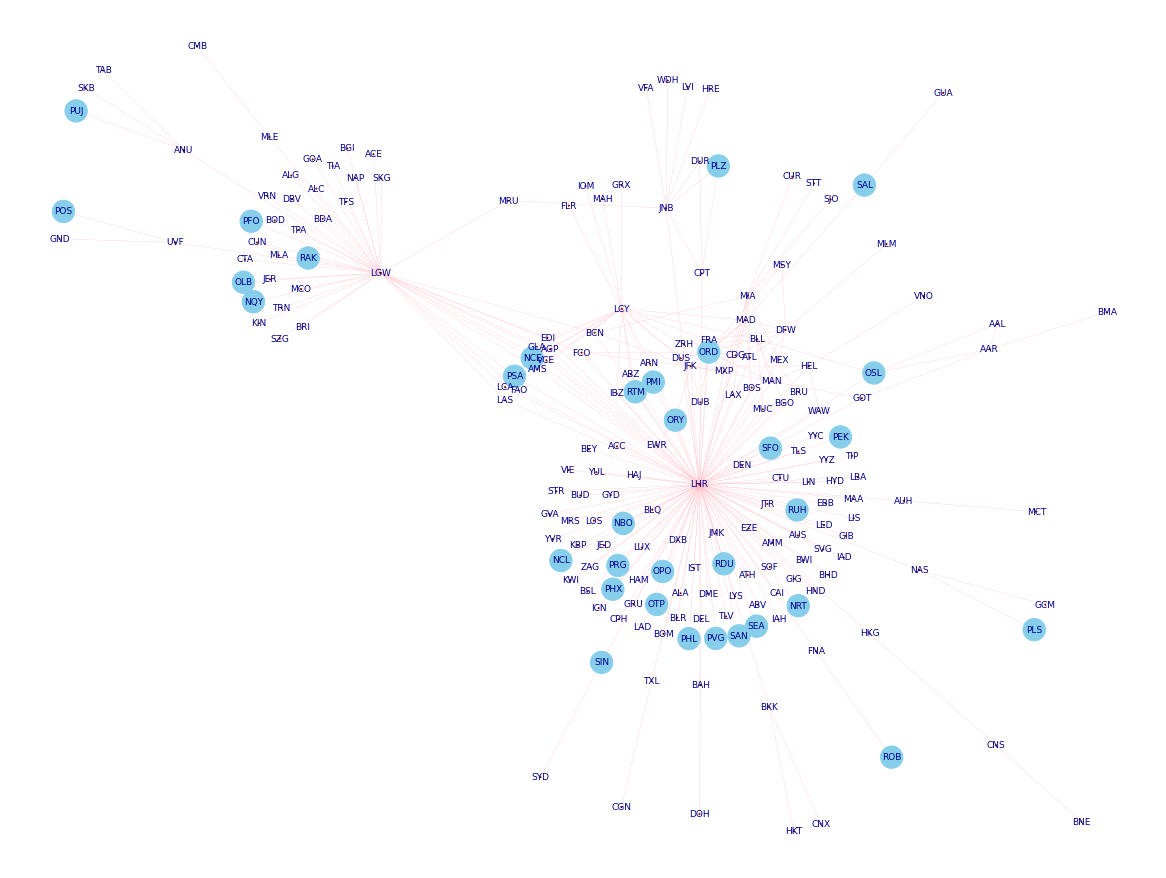

In [151]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= node_colors,
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Directed Graphs

In [77]:
directed_routes= nx.DiGraph(british_routes.edges)
directed_routes.is_directed()

In [148]:
from pandas import DataFrame
british_indegree= DataFrame(directed_routes.in_degree, 
                            columns= ["Airport", "In-degree"])
british_indegree.shape

(203, 2)

In [84]:
british_indegree[british_indegree["In-degree"]> 2].shape

(203, 2)

In [85]:
british_outdegree= DataFrame(directed_routes.out_degree, columns= ["Airport", "Out-degree"])

In [86]:
british_outdegree[british_outdegree["Out-degree"]> 2].head(4)

,Airport,Out-degree
1,AAR,3
6,LHR,53
8,LCY,7
11,LGW,20


In [87]:
nx.diameter(british_routes)

7

In [88]:
nx.transitivity(british_routes)

0.01357329579730545

In [101]:
british_indegree

,Airport,In-degree
0,AAL,0
1,AAR,1
2,OSL,4
3,BMA,1
4,GOT,1
...,...,...
198,STT,1
199,SJO,1
200,PLS,1
201,POS,0
